# TASK 5

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv(R'C:\Users\Sanya srivastava\Desktop\Data project\RTA Dataset.csv')

In [32]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [33]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [34]:
df.shape

(12316, 32)

In [35]:
df.describe(include="all")

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [37]:
df.duplicated().sum()

np.int64(0)

In [38]:
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [39]:
df.drop(['Service_year_of_vehicle','Defect_of_vehicle','Work_of_casuality', 'Fitness_of_casuality','Time'], axis = 1, inplace = True)
df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,NaN,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,other,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,other,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,Industrial areas,other,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury


In [58]:
categorical=[i for i in df.columns if df[i].dtype=='O']
print('The categorical variables are',categorical)

The categorical variables are ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


In [41]:
for i in categorical:
    df[i] = df[i].fillna(df[i].mode()[0])

In [42]:
df.isna().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

## DATA VISUALIZATION

Text(0.5, 1.0, 'Distribution of Accident severity')

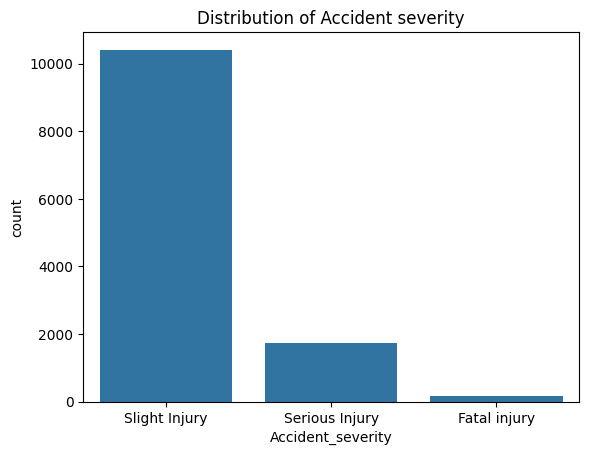

In [66]:
df['Accident_severity'].value_counts()
sns.countplot(x=df['Accident_severity'])
plt.title('Distribution of Accident severity')

<Axes: xlabel='Number_of_casualties', ylabel='Number_of_vehicles_involved'>

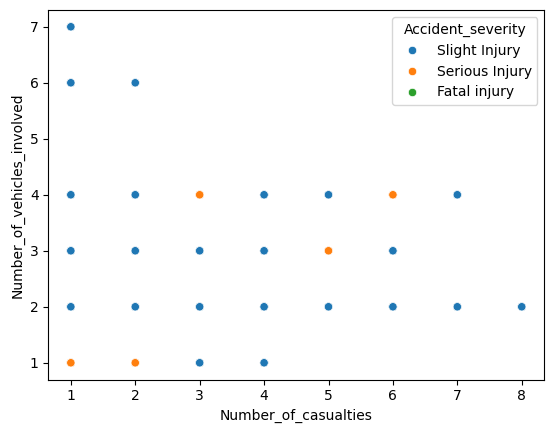

In [67]:
sns.scatterplot(x=df['Number_of_casualties'], y=df['Number_of_vehicles_involved'], hue=df['Accident_severity'])

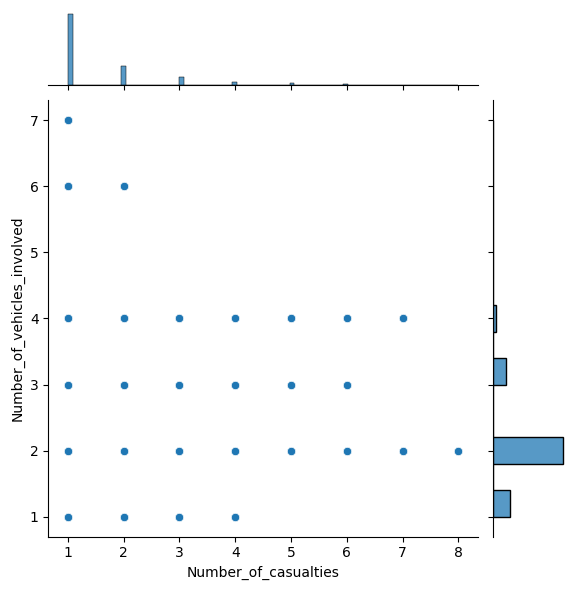

In [68]:
sns.jointplot(x='Number_of_casualties',y='Number_of_vehicles_involved',data=df)

In [69]:
np.random.seed(0)
n_samples = 1000

In [70]:
road_conditions = np.random.choice(['Dry', 'Wet', 'Icy'], size=n_samples)
weather_conditions = np.random.choice(['Clear', 'Rainy', 'Snowy'], size=n_samples)
time_of_day = np.random.randint(0, 24, size = n_samples)

In [71]:
latitute = np.random.uniform(40, 41, size=n_samples)
longitude = np.random.uniform(-74, -73, size=n_samples)
severity = np.random.randint(1, 6, size=n_samples)

In [72]:
data = pd.DataFrame({
    'road_condition': road_conditions,
    'weather': weather_conditions,
    'time_of_day': time_of_day,
    'latitude': latitute,
    'longitude': longitude,
    'severity': severity
})

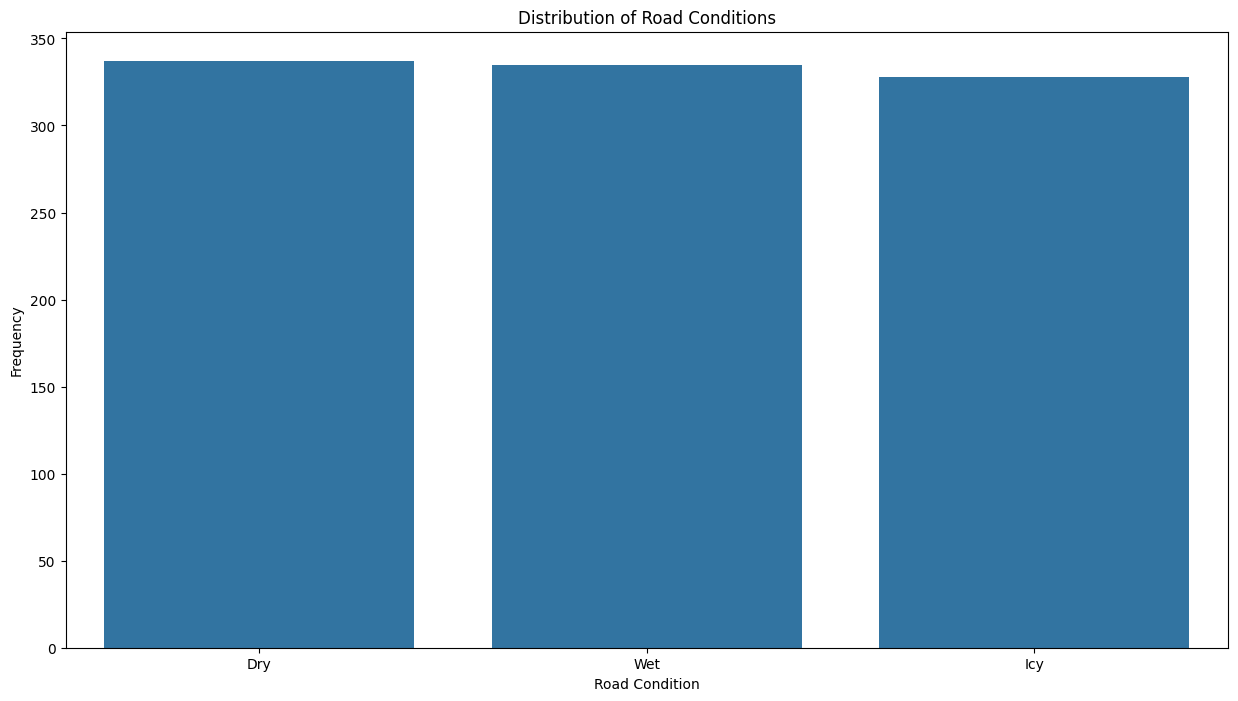

In [73]:
plt.figure(figsize=(15, 8))
sns.countplot(x='road_condition', data=data)
plt.title('Distribution of Road Conditions')
plt.xlabel('Road Condition')
plt.ylabel('Frequency')
plt.show()

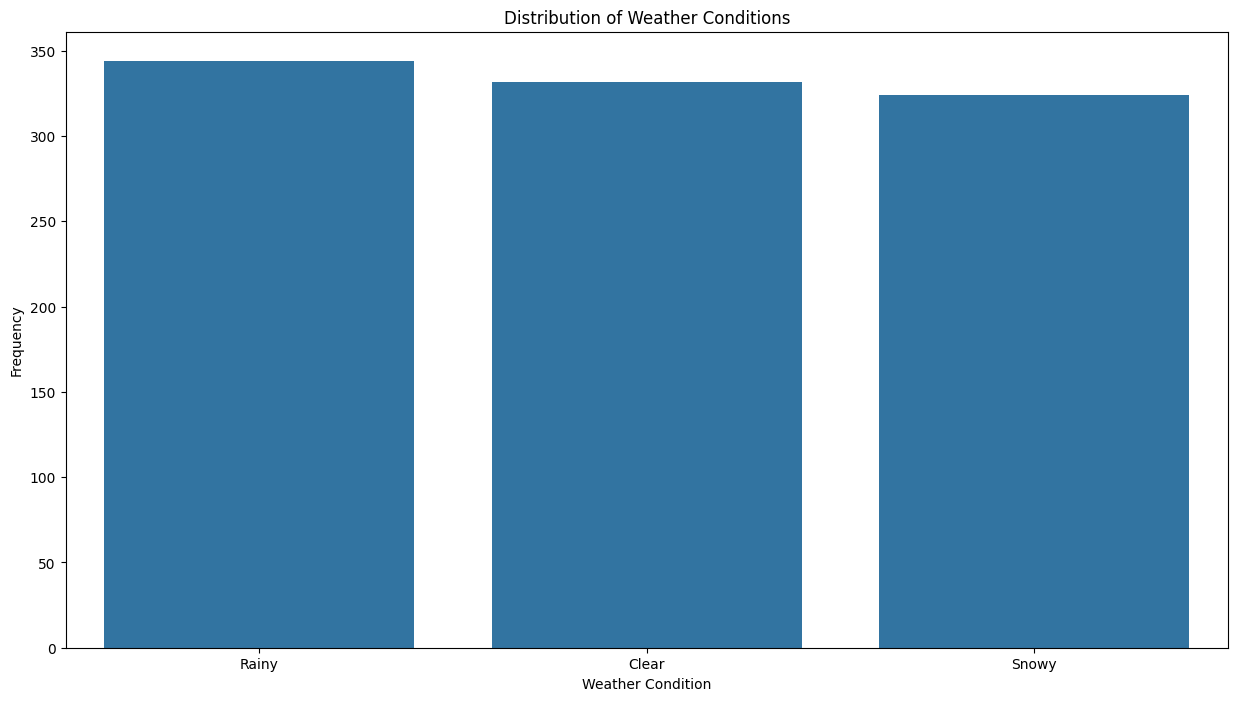

In [74]:
plt.figure(figsize=(15, 8))
sns.countplot(x='weather', data=data)
plt.title('Distribution of Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.show()

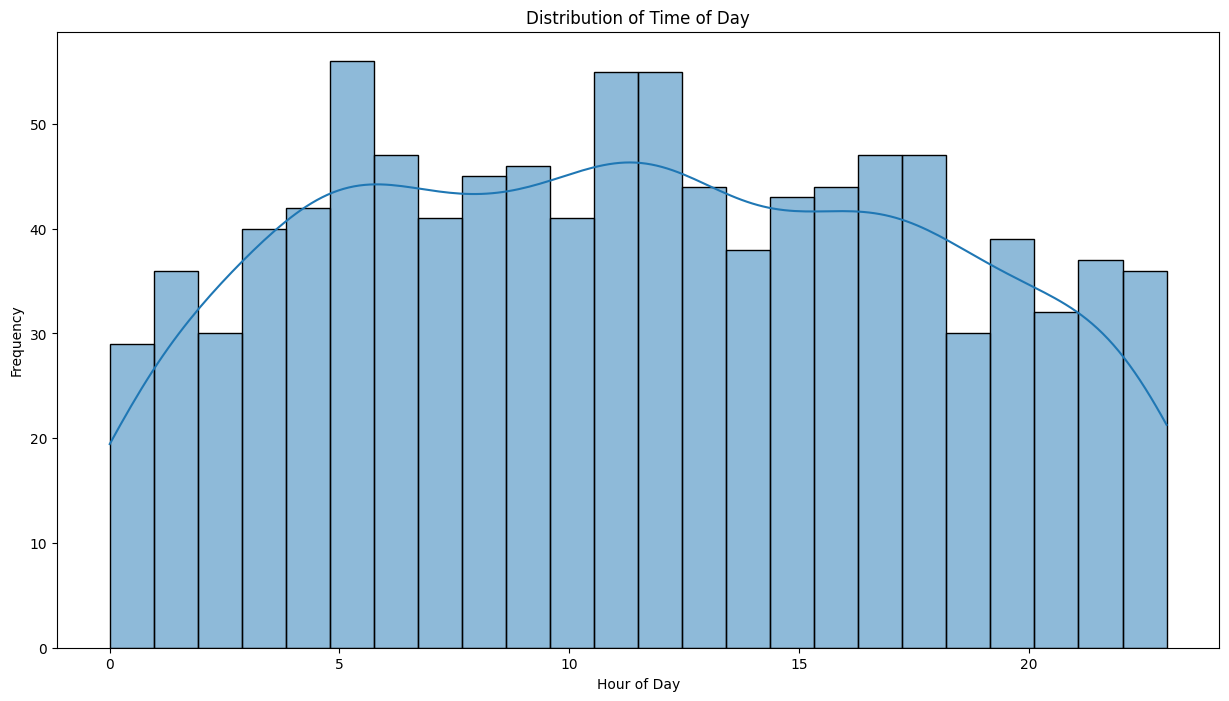

In [76]:
plt.figure(figsize=(15, 8))
sns.histplot(data['time_of_day'], bins=24, kde=True)
plt.title('Distribution of Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()

In [77]:
X = data[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
data['cluster'] = kmeans.labels_

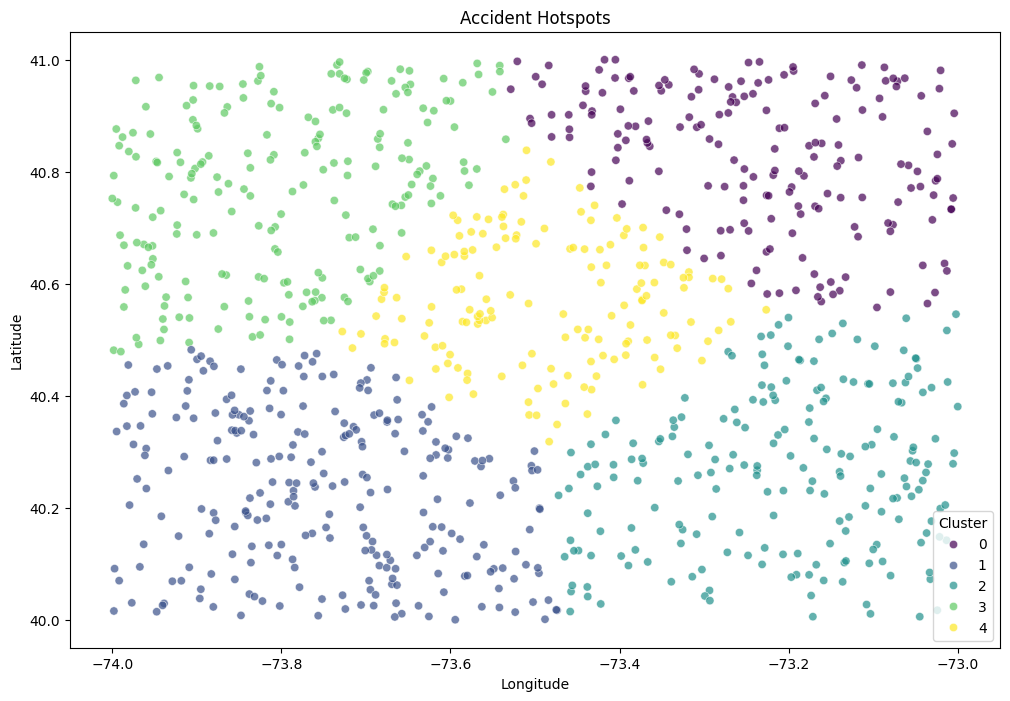

In [79]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=data, palette='viridis', alpha=0.7)
plt.title('Accident Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()

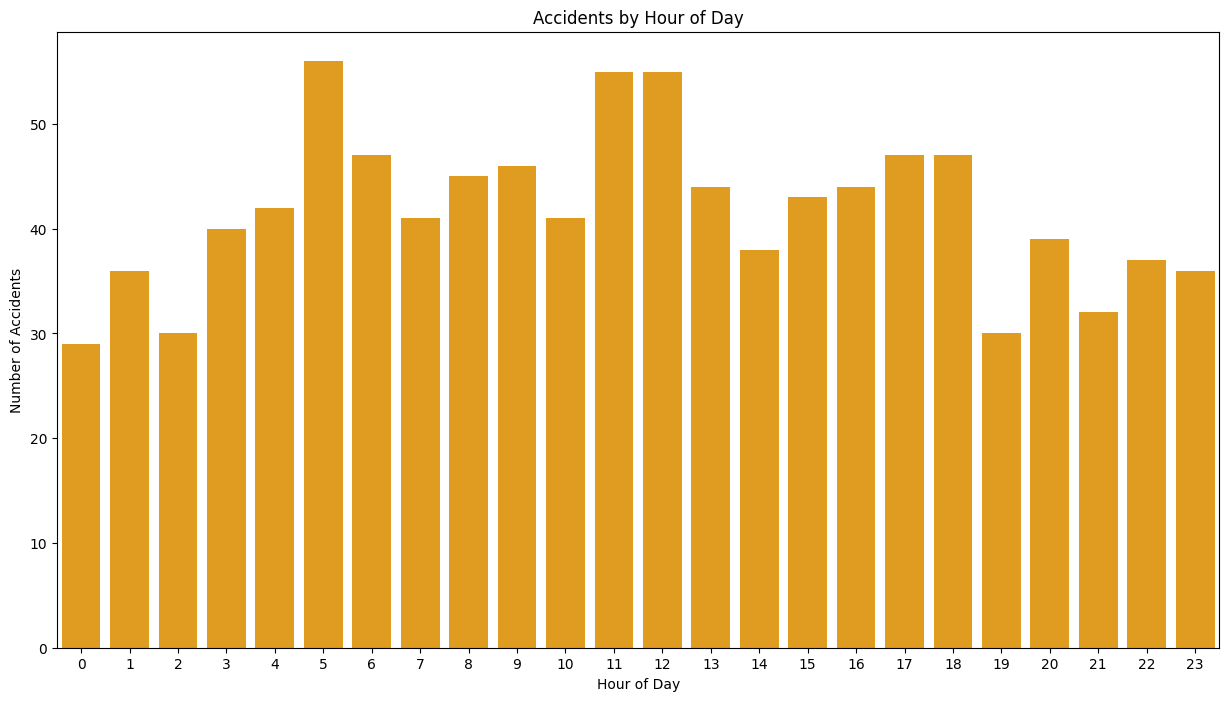

In [80]:
plt.figure(figsize=(15, 8))
sns.countplot(x='time_of_day', data=data, color='orange')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

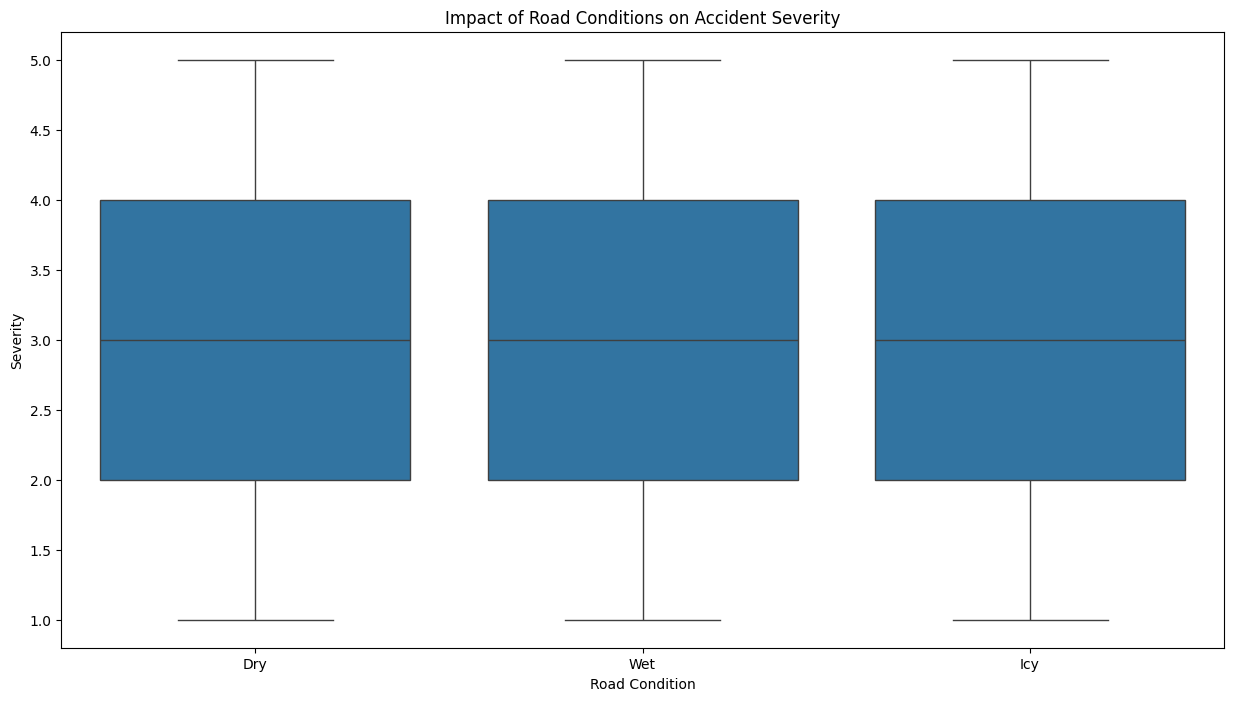

In [81]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='road_condition', y='severity', data=data)
plt.title('Impact of Road Conditions on Accident Severity')
plt.xlabel('Road Condition')
plt.ylabel('Severity')
plt.show()

In [89]:
numerical=[i for i in df.columns if df[i].dtype!='O']
print('The numerical variables are\n',numerical)

The numerical variables are
 ['Number_of_vehicles_involved', 'Number_of_casualties']


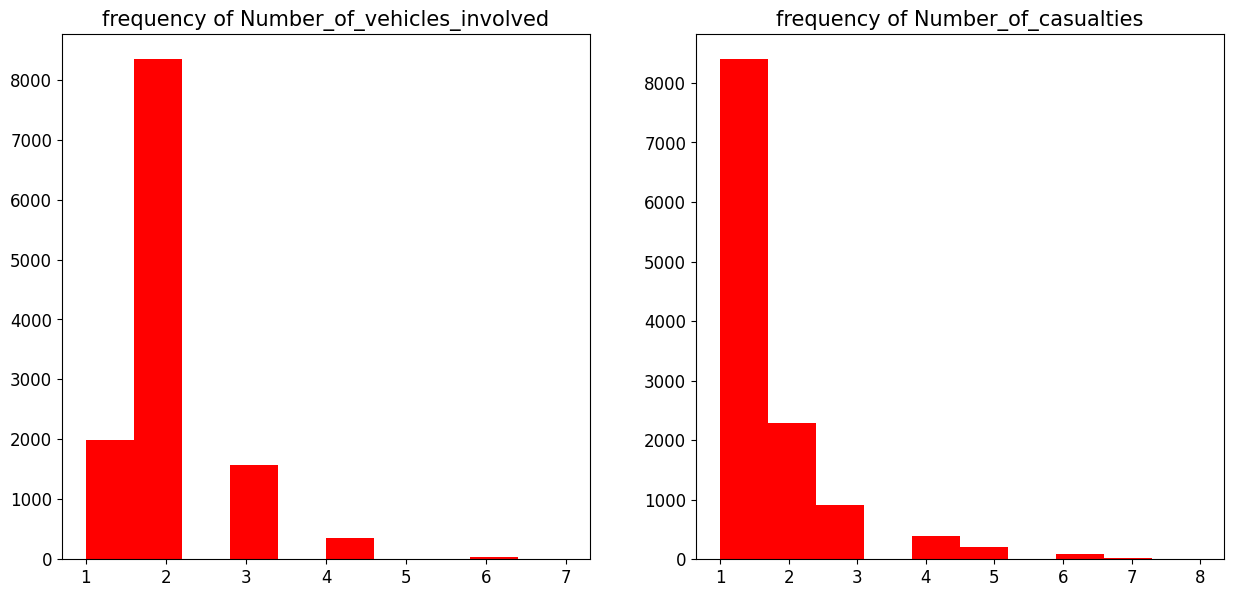

In [90]:
plt.figure(figsize=(15,15))
plotnumber = 1
for i in numerical:
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(2,2,plotnumber)
        plt.hist(df[i],color='red')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title('frequency of '+i, fontsize=15)
    plotnumber +=1

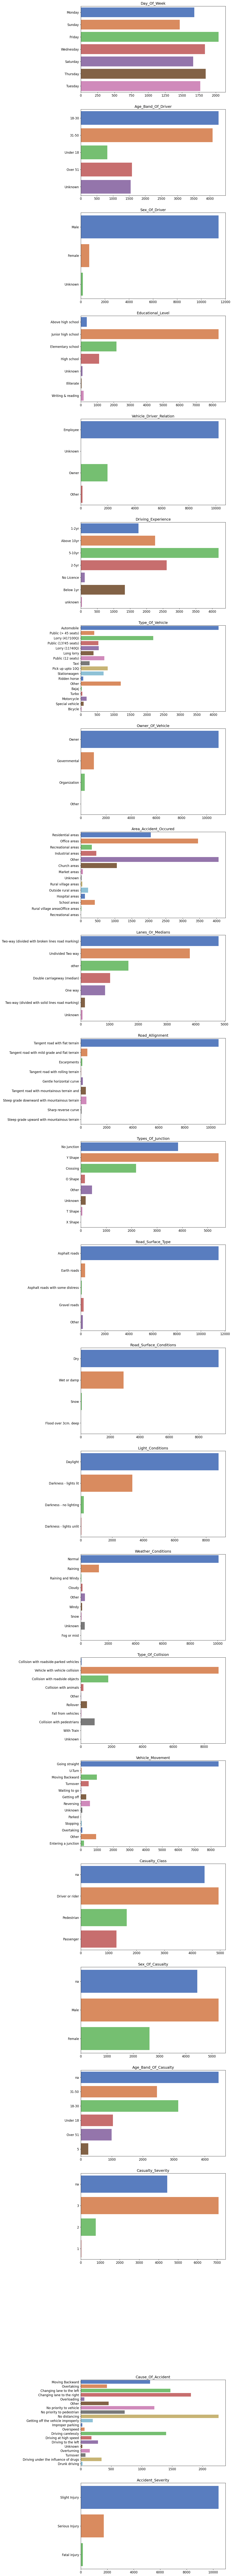

In [93]:
plt.figure(figsize=(10,200))
plotnumber = 1

for col in categorical:
    if plotnumber <= df.shape[1] and col!='Pedestrian_movement':
        ax1 = plt.subplot(28,1,plotnumber)
        sns.countplot(data=df, y=col, palette='muted')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1

#### Correlation Matrix

In [95]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df1=pd.DataFrame()

for i in categorical:
    if i!= 'Accident_severity':
        df1[i]=le.fit_transform(df[i])

In [96]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Day_of_week              12316 non-null  int64
 1   Age_band_of_driver       12316 non-null  int64
 2   Sex_of_driver            12316 non-null  int64
 3   Educational_level        12316 non-null  int64
 4   Vehicle_driver_relation  12316 non-null  int64
 5   Driving_experience       12316 non-null  int64
 6   Type_of_vehicle          12316 non-null  int64
 7   Owner_of_vehicle         12316 non-null  int64
 8   Area_accident_occured    12316 non-null  int64
 9   Lanes_or_Medians         12316 non-null  int64
 10  Road_allignment          12316 non-null  int64
 11  Types_of_Junction        12316 non-null  int64
 12  Road_surface_type        12316 non-null  int64
 13  Road_surface_conditions  12316 non-null  int64
 14  Light_conditions         12316 non-null  int64
 15  We

<Axes: >

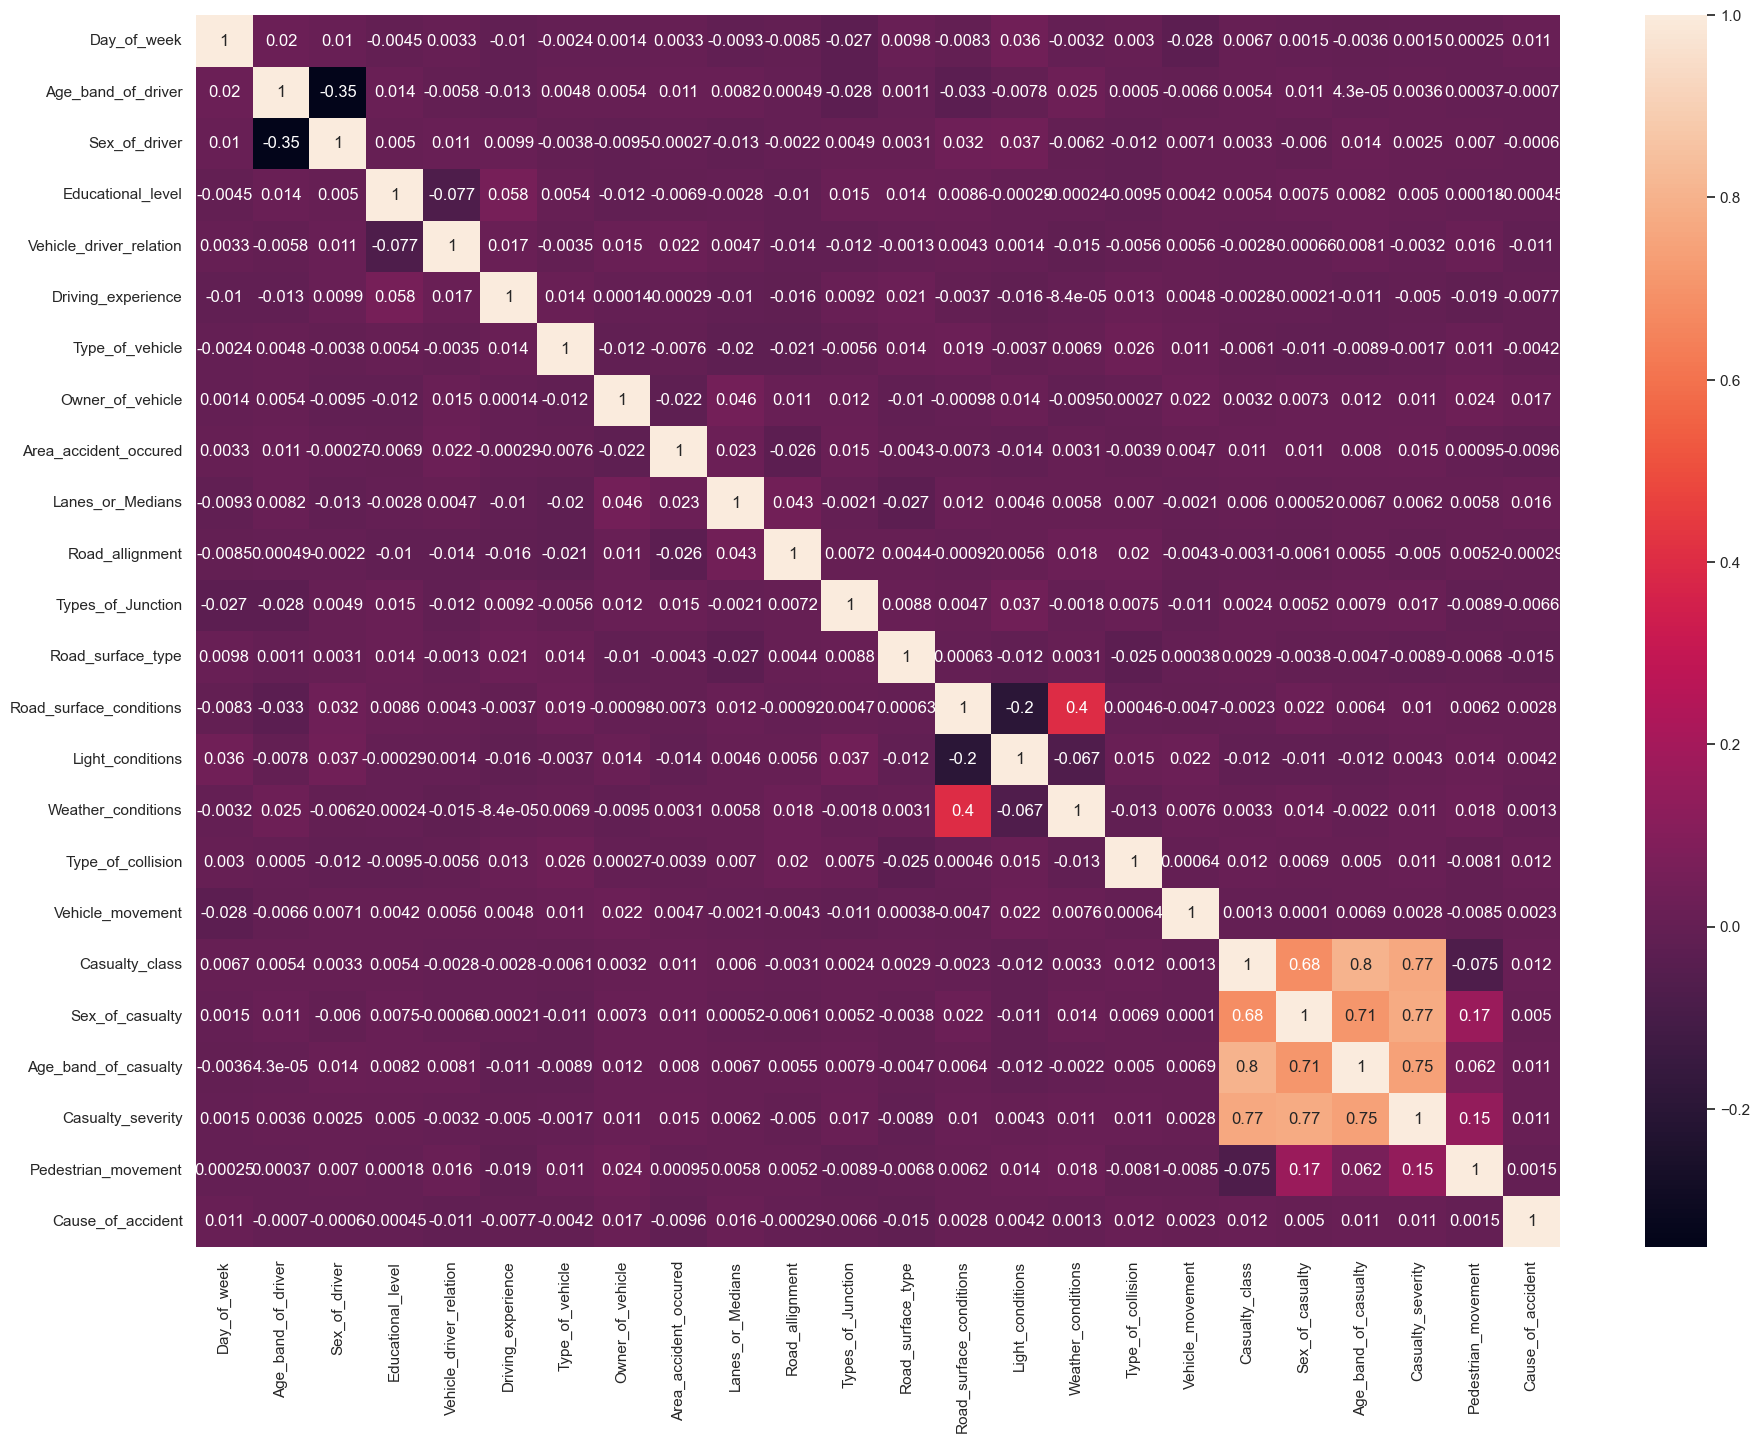

In [99]:
plt.figure(figsize=(22,16))
sns.set(font_scale=1)
sns.heatmap(df1.corr(), annot=True)